In [1]:
#import liberies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
#import data from csv
data_path= './salaries.csv'

data_salary = pd.read_csv(data_path)

data_salary

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7969,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
7970,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
7971,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
7972,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [21]:

data_salary = data_salary.rename(columns={
    'work_year':'Year_of_Employment',
    'experience_level':'Experience_Level',
    'employment_type':'Employment_Type',
    'job_title':'Job_Title',
    'salary':'Salary',
    'salary_currency':'Currency',
    'salary_in_usd':'Salary(USD)',
    'employee_residence':'Employee_Ressidence',
    'remote_ratio':'Remote_Status',
    'company_location':'Company_Location',
    'company_size':'Company_Size'})

data_salary

,Year_of_Employment,Experience_Level,Employment_Type,Job_Title,Salary,Currency,Salary(USD),Employee_Ressidence,Remote_Status,Company_Location,Company_Size
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7969,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
7970,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
7971,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
7972,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [29]:
emp_dict = {'FT':'Full_Time',
            'PT':'Part_Time',
            'CT':'Contract',
            'FL':'Freelance'}

data_salary['Employment_Type'] = data_salary['Employment_Type'].replace(emp_dict)
data_salary

,Year_of_Employment,Experience_Level,Employment_Type,Job_Title,Salary,Currency,Salary(USD),Employee_Ressidence,Remote_Status,Company_Location,Company_Size
0,2023,SE,Full_Time,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,Full_Time,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,Full_Time,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,Full_Time,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,Full_Time,Data Scientist,290000,USD,290000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7969,2020,SE,Full_Time,Data Scientist,412000,USD,412000,US,100,US,L
7970,2021,MI,Full_Time,Principal Data Scientist,151000,USD,151000,US,100,US,L
7971,2020,EN,Full_Time,Data Scientist,105000,USD,105000,US,100,US,S
7972,2020,EN,Contract,Business Data Analyst,100000,USD,100000,US,100,US,L


In [30]:
employment_type = data_salary.set_index(['Employment_Type'])['Salary(USD)']
employment_type

Employment_Type
Full_Time    202800
Full_Time    104300
Full_Time     73824
Full_Time     67672
Full_Time    290000
              ...  
Full_Time    412000
Full_Time    151000
Full_Time    105000
Contract     100000
Full_Time     94665
Name: Salary(USD), Length: 7974, dtype: int64

In [79]:
employment_type_avg = data_salary.groupby(['Employment_Type'])['Salary(USD)'].mean()
employment_type_avg

Employment_Type
Contract     120837.666667
Freelance     54734.363636
Full_Time    149724.790847
Part_Time     52053.153846
Name: Salary(USD), dtype: float64

In [80]:
employment_type_avg = employment_type_avg.sort_values(ascending=True)
employment_type_avg


Employment_Type
Part_Time     52053.153846
Freelance     54734.363636
Contract     120837.666667
Full_Time    149724.790847
Name: Salary(USD), dtype: float64

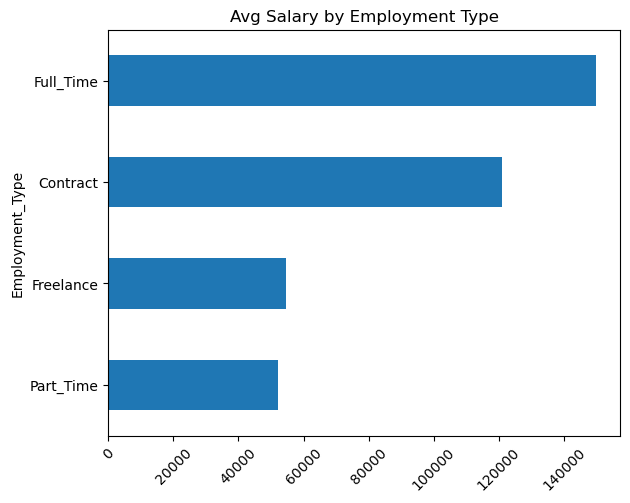

In [87]:
employment_type_avg.plot(kind='barh')


plt.title('Avg Salary by Employment Type')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [48]:
company_dict = {'S':'Small (Less than 50 Employees)',
            'M':'Medium (50 to 250 Employees)',
            'L':'Large (More than 250 Employees)',
             }

data_salary['Company_Size'] = data_salary['Company_Size'].replace(company_dict)
data_salary

,Year_of_Employment,Experience_Level,Employment_Type,Job_Title,Salary,Currency,Salary(USD),Employee_Ressidence,Remote_Status,Company_Location,Company_Size
0,2023,SE,Full_Time,Business Intelligence Engineer,202800,USD,202800,US,0,US,Large(More than 250 Employees)
1,2023,SE,Full_Time,Business Intelligence Engineer,104300,USD,104300,US,0,US,Large(More than 250 Employees)
2,2023,MI,Full_Time,Data Manager,60000,GBP,73824,GB,0,GB,Medium(50 to 250 Employees)
3,2023,MI,Full_Time,Data Manager,55000,GBP,67672,GB,0,GB,Medium(50 to 250 Employees)
4,2023,SE,Full_Time,Data Scientist,290000,USD,290000,US,0,US,Medium(50 to 250 Employees)
...,...,...,...,...,...,...,...,...,...,...,...
7969,2020,SE,Full_Time,Data Scientist,412000,USD,412000,US,100,US,Large(More than 250 Employees)
7970,2021,MI,Full_Time,Principal Data Scientist,151000,USD,151000,US,100,US,Large(More than 250 Employees)
7971,2020,EN,Full_Time,Data Scientist,105000,USD,105000,US,100,US,Small(Less than 50 Employees)
7972,2020,EN,Contract,Business Data Analyst,100000,USD,100000,US,100,US,Large(More than 250 Employees)


In [49]:
company_size = data_salary.set_index(['Company_Size'])['Salary(USD)']
company_size

Company_Size
Large(More than 250 Employees)    202800
Large(More than 250 Employees)    104300
Medium(50 to 250 Employees)        73824
Medium(50 to 250 Employees)        67672
Medium(50 to 250 Employees)       290000
                                   ...  
Large(More than 250 Employees)    412000
Large(More than 250 Employees)    151000
Small(Less than 50 Employees)     105000
Large(More than 250 Employees)    100000
Large(More than 250 Employees)     94665
Name: Salary(USD), Length: 7974, dtype: int64

In [57]:
company_size_avg = data_salary.groupby(['Company_Size'])['Salary(USD)'].mean()
company_size_avg

Company_Size
Large(More than 250 Employees)    133621.020000
Medium(50 to 250 Employees)       152336.441334
Small(Less than 50 Employees)      88727.403614
Name: Salary(USD), dtype: float64

In [90]:
company_size_avg = company_size_avg.sort_values(ascending=True)
company_size_avg

Company_Size
Small(Less than 50 Employees)      88727.403614
Large(More than 250 Employees)    133621.020000
Medium(50 to 250 Employees)       152336.441334
Name: Salary(USD), dtype: float64

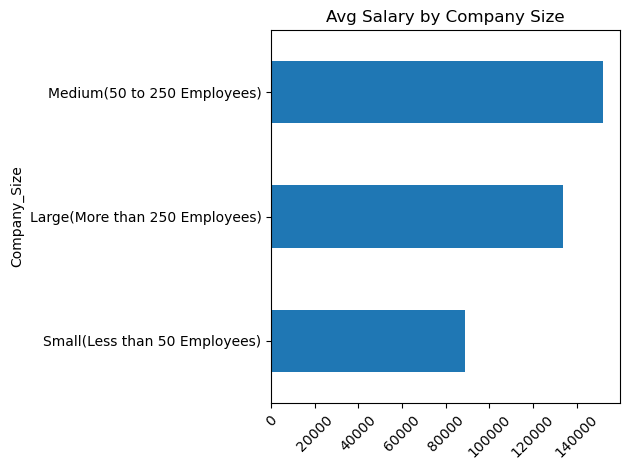

In [91]:
company_size_avg.plot(kind='barh')

plt.title('Avg Salary by Company Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [95]:
employment_type_count = data_salary['Employment_Type'].value_counts()
employment_type_count

Full_Time    7932
Contract       18
Part_Time      13
Freelance      11
Name: Employment_Type, dtype: int64

In [96]:
company_size_count = data_salary['Company_Size'].value_counts()
company_size_count

Medium(50 to 250 Employees)       7108
Large(More than 250 Employees)     700
Small(Less than 50 Employees)      166
Name: Company_Size, dtype: int64